<a href="https://colab.research.google.com/github/leoa4238/careers/blob/main/template_045_2D_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augmentation (이미지 증강) - 데이터 증강 기법
- **회전 (Rotation)** - 이미지를 다양한 각도로 회전하여 데이터 변화를 추가.
- **좌우 뒤집기 (Horizontal Flip)** - 이미지를 좌우로 반전하여 비대칭성을 학습.
- **이동 (Translation)** - 이미지를 일정 방향으로 이동시켜 위치 변화를 학습.
- **밝기/대비/채도 조정 (Brightness/Contrast/Saturation)** - 이미지를 다양한 조명 및 색상 조건에 맞게 변환.

In [2]:
from google.colab import files
upload = files.upload()

Saving images-Xray.zip to images-Xray.zip


In [3]:
!unzip images-Xray.zip -d /content/

Archive:  images-Xray.zip
   creating: /content/images-Xray/
  inflating: /content/images-Xray/009000.jpg  
  inflating: /content/images-Xray/009002.jpg  
  inflating: /content/images-Xray/009003.jpg  
  inflating: /content/images-Xray/009004.jpg  
  inflating: /content/images-Xray/009007.jpg  
  inflating: /content/images-Xray/009008.jpg  
  inflating: /content/images-Xray/009009.jpg  
  inflating: /content/images-Xray/B0023_0002.png  
  inflating: /content/images-Xray/B0081_0002.png  


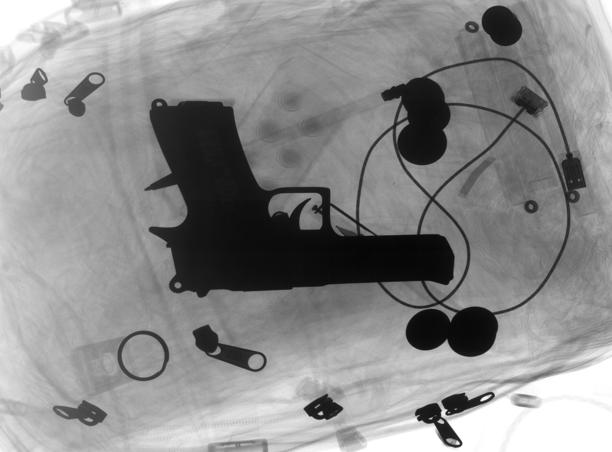

In [4]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로 설정
image_path = "images-Xray/B0023_0002.png"
# image_path = "images-Xray/009007.jpg"
# 원본 이미지 읽기
original_image = Image.open(image_path)
original_image

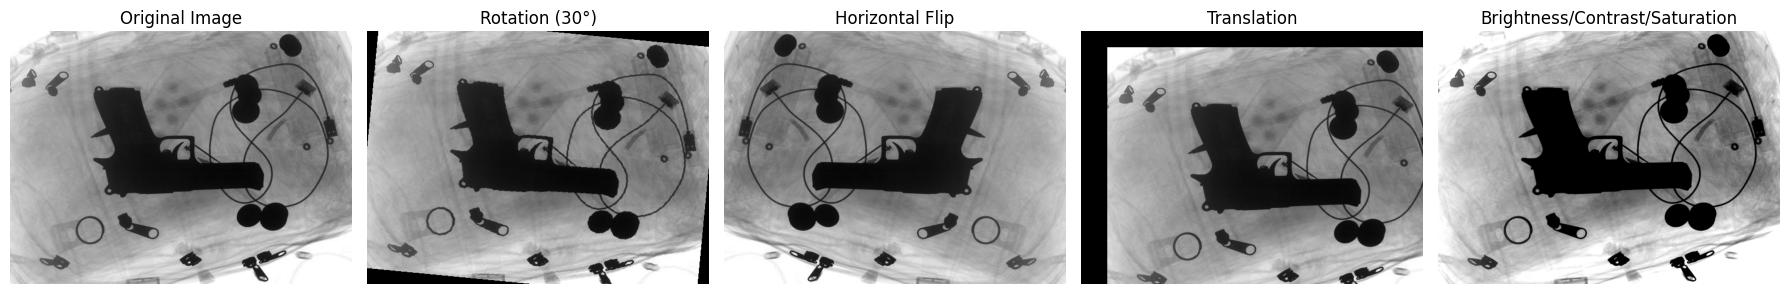

In [5]:
# 데이터 증강 종류별 파이프라인 정의
augmentations = {
    "Rotation (30°)": transforms.RandomRotation(50),  # 30도 회전
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0),  # 좌우 뒤집기
    "Translation": transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),  # 이미지 이동
    "Brightness/Contrast/Saturation": transforms.ColorJitter(
        brightness=0.5, contrast=0.5, saturation=0.5        # 밝기, 대비, 채도 조정
    ),
}
# 증강 이미지 저장을 위한 딕셔너리
augmented_images = {}

for name, augmentation in augmentations.items():
    # 증강 변환 정의 (증강 + 텐서 변환)
    transform = transforms.Compose([augmentation, transforms.ToTensor()])
    augmented_image = transform(original_image)  # 증강 변환을 원본 이미지에 적용
    augmented_image = augmented_image.permute(1, 2, 0)   # 텐서 형식 변환 (C, H, W -> H, W, C)
    augmented_images[name] = augmented_image   # 결과를 딕셔너리에 저장

# 원본 이미지와 증강된 이미지를 subplot에 표시
fig, axes = plt.subplots(1, len(augmentations) + 1, figsize=(18, 6))

# 원본 이미지 표시
axes[0].imshow(original_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original Image")


# 각 증강된 이미지 표시
for idx, (name, augmented_image) in enumerate(augmented_images.items(), start=1):

    axes[idx].imshow(augmented_image, cmap='gray')
    axes[idx].axis('off')
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()

# 연습 문제 - 데이터 증강 변형 및 비교 실습  
원본 이미지에 다양한 데이터 증강(Data Augmentation)을 적용하여 변환된 이미지를 시각화하고 비교합니다. 위의 코드를 참고하여 새로운 증강 기법을 추가하고, 각 증강된 이미지의 효과를 확인하세요.


1. **기존 증강 기법에 추가**:
   - 아래의 증강 기법을 `augmentations` 딕셔너리에 추가하세요:
     - **Vertical Flip**: 이미지를 위아래로 뒤집기.
     - **Random Crop**: 이미지를 랜덤하게 잘라내고 크기를 원래 크기로 조정.
<br></br>
2. **각 증강 기법에 대한 비교**:
   - 원본 이미지와 기존 증강 기법(회전, 좌우 뒤집기, 이동, 밝기/대비/채도) 그리고 새롭게 추가된 증강 기법(위아래 뒤집기, 랜덤 크롭)을 한 화면에 표시하세요.
<br></br>
3. **새로운 레이아웃**:
   - 원본 이미지를 첫 번째 행에, 각 증강된 이미지를 두 번째 행에 배치하세요.
   - subplot의 행과 열 수를 자동으로 조정하여 그래프를 깔끔하게 배치하세요.
   - 최종 이미지를 출력하여 비교하세요.

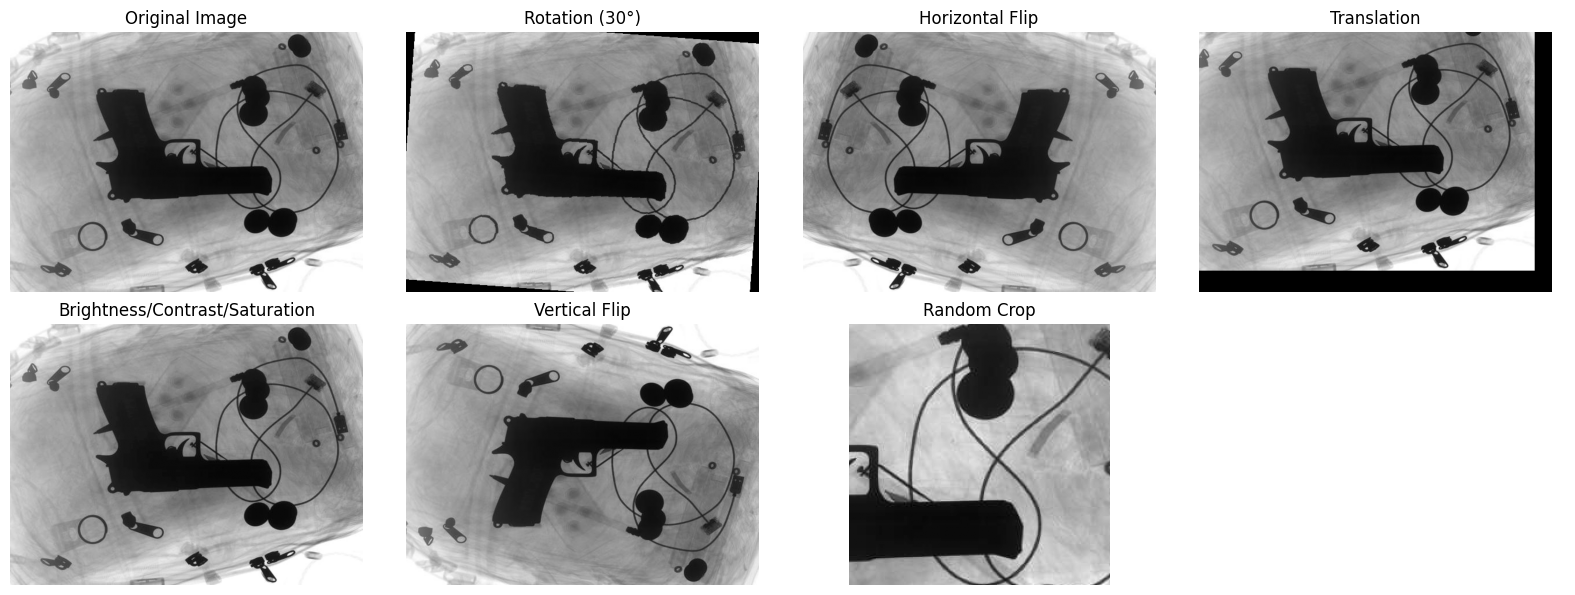

In [8]:
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

# 예시용 이미지 (PIL 이미지 필요)
# original_image = Image.open("your_image_path.jpg")  # 예: PIL.Image

# 데이터 증강 정의
augmentations = {
    "Rotation (30°)": transforms.RandomRotation(30),
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0),
    "Translation": transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
    "Brightness/Contrast/Saturation": transforms.ColorJitter(
        brightness=0.5, contrast=0.5, saturation=0.5
    ),
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0),
    "Random Crop": transforms.Compose([
        transforms.RandomCrop(size=(224, 224)),
        transforms.Resize((224, 224))
    ]),
}

# 증강 이미지 저장 딕셔너리
augmented_images = {}

# 변환 및 저장
for name, augmentation in augmentations.items():
    transform = transforms.Compose([augmentation, transforms.ToTensor()])
    augmented_image = transform(original_image)
    augmented_image = augmented_image.permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
    augmented_images[name] = augmented_image

# 전체 subplot 그리드 크기 계산
num_aug = len(augmentations)
cols = (num_aug + 1 + 1) // 2  # +1 for original image, 나머지 /2로 2행 배치
rows = 2

# subplot 생성
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 6))

# flatten for easier indexing
axes = axes.flatten()

# 원본 이미지 표시 (첫 번째 칸)
axes[0].imshow(original_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original Image")

# 각 증강 이미지 표시
for idx, (name, img) in enumerate(augmented_images.items(), start=1):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].axis('off')
    axes[idx].set_title(name)

# 빈 subplot 숨기기 (남는 칸 있을 경우)
for i in range(len(augmented_images) + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


